In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#importing wordcloud for word visualization
from wordcloud import WordCloud
#importing nltk for natural language processing
import nltk
from nltk.corpus import stopwords

#DOWNLOADING NLTK data
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
df = pd.read_csv('spam.csv', encoding = 'latin-1')
df


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [10]:
styled_df = df.head()
styled_df = styled_df.style.set_table_styles([
    {"selector": "th", "props": [("color", 'black'), ("background-color", "#FFF")]}
])
styled_df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",nan,nan,nan
1,ham,Ok lar... Joking wif u oni...,nan,nan,nan
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,nan,nan,nan
3,ham,U dun say so early hor... U c already then say...,nan,nan,nan
4,ham,"Nah I don't think he goes to usf, he lives around here though",nan,nan,nan


Data Info

In [17]:
df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
Index(['v1', 'v2'], dtype='object')


Drop the Columns

In [19]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True,errors='ignore')

In [24]:
styled_df = df.head(5).style
# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'Black'), ("background-color", "#FFF"), ('font-weight', 'bold')]}
])

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


 Rename the Column


In [27]:
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)

 Convert the target variable

In [29]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])



In [33]:
styled_df = df.head().style
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'Black'), ("background-color", "#FFF"), ('font-weight', 'bold')]}
])

,target,text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"


 Check Missing values

In [37]:
df.isnull().sum()

,0
target,0
text,0


 Check Duplicate values

In [39]:
df.duplicated().sum()

403

 Remove Duplicate values

In [41]:
df = df.drop_duplicates(keep = 'first')

 Shape of the Dataset

In [42]:
df.shape

(5169, 2)

EXPLORATORY DATA ANALYSIS



 Percentage of Ham and Spam

In [48]:
values = df['target'].value_counts()
total = values.sum()
percentage_0 = (values[0] / total) * 100
percentage_1 = (values[1]/ total) *100
print(f"Percentage of Ham: {percentage_0:.2f}%")
print(f"Percentage of Spam: {percentage_1:.2f}%")

Percentage of Ham: 87.37%
Percentage of Spam: 12.63%


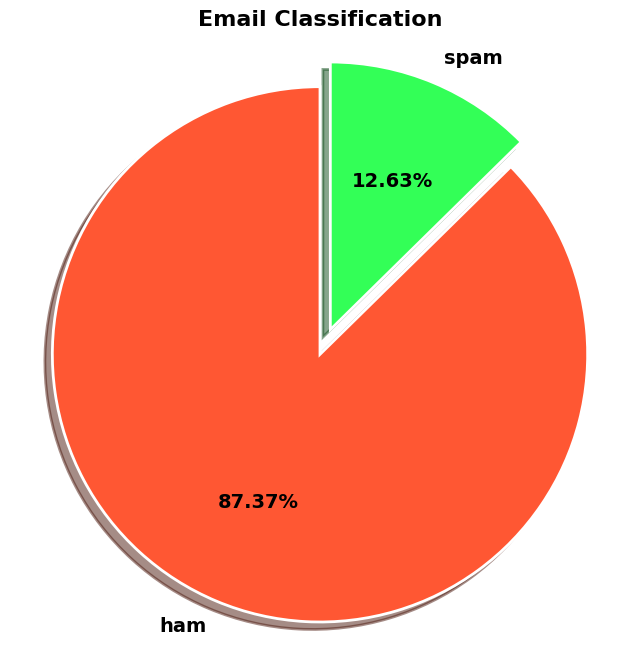

In [57]:

import matplotlib.pyplot as plt
colors = ['#FF5733', '#33FF57']
# Define the explode parameter to create a gap between slices
explode = (0, 0.1)  # Explode the second slice (spam) by 10%
fig , ax = plt.subplots(figsize=(8,8))
ax.set_facecolor('white')
wedges , texts , autotexts = ax.pie(
    values, labels = ['ham' , 'spam'],
    autopct='%0.2f%%',
    startangle = 90,
    colors = colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,
    shadow = True

)
# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

ax.set_title('Email Classification', fontsize=16, fontweight='bold')
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()

The graph the percentage of ham is too high (87.37%) as compare to spam messages percentage.
so the data is imbalance